In [1]:
import tensorflow as tf
import numpy as np
%matplotlib inline
from matplotlib.colors import ListedColormap
from matplotlib import pyplot as plt

In [2]:
X = tf.constant([[-0.23390341,  1.18151883, -2.46493986,  1.55322202,  1.27621763,
                   2.39710997, -1.34403040, -0.46903436, -0.64673502, -1.44029872,
                  -1.37537243,  1.05994811, -0.93311512,  1.02735575, -0.84138778,
                  -2.22585412, -0.42591102,  1.03561105,  0.91125595, -2.26550369],
                 [-0.92254932, -1.10309630, -2.41956036, -1.15509002, -1.04805327,
                   0.08717325,  0.81847250, -0.75171045,  0.60664705,  0.80410947,
                  -0.11600488,  1.03747218, -0.67210575,  0.99944446, -0.65559838,
                  -0.40744784, -0.58367642,  1.05972780, -0.95991874, -1.41720255]], dtype=tf.float32)

Y = tf.constant([[0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1.],
                 [1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0.]], dtype=tf.float32)

In [3]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

In [4]:
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.005), loss='categorical_crossentropy', metrics=['accuracy'])

In [5]:
class NBatchLogger(tf.keras.callbacks.Callback):
    
    def __init__(self, X, Y, n):
        
        self.X = X
        self.Y = Y
        self.seen = 0
        self.n = n
        
    def on_batch_end(self, batch, logs=None):
        
        self.seen += 1
        
        if self.seen % self.n == 1:
            
            metrics = self.model.evaluate(tf.transpose(self.X), tf.transpose(self.Y), verbose=0)
            print('Iteration =', self.seen, '\tAcc =', metrics[1], '\tLoss =', metrics[0], flush=True)

In [6]:
model.fit(tf.transpose(X), tf.transpose(Y), batch_size=1, epochs=(100000 // 20), verbose=0, callbacks=[NBatchLogger(X, Y, 250)])

Iteration = 1 	Acc = 0.75 	Loss = 0.6277180910110474


W0329 19:32:13.454325 140592853210944 callbacks.py:236] Method (on_train_batch_end) is slow compared to the batch update (0.132159). Check your callbacks.


Iteration = 251 	Acc = 0.9 	Loss = 0.43712979555130005
Iteration = 501 	Acc = 0.9 	Loss = 0.33396413922309875
Iteration = 751 	Acc = 0.9 	Loss = 0.28002071380615234
Iteration = 1001 	Acc = 0.9 	Loss = 0.24655354022979736
Iteration = 1251 	Acc = 0.9 	Loss = 0.2267615795135498
Iteration = 1501 	Acc = 0.9 	Loss = 0.21295323967933655
Iteration = 1751 	Acc = 0.9 	Loss = 0.20483747124671936
Iteration = 2001 	Acc = 0.9 	Loss = 0.19869253039360046
Iteration = 2251 	Acc = 0.9 	Loss = 0.19416102766990662
Iteration = 2501 	Acc = 0.95 	Loss = 0.18667593598365784
Iteration = 2751 	Acc = 0.95 	Loss = 0.18277189135551453
Iteration = 3001 	Acc = 0.95 	Loss = 0.17989571392536163
Iteration = 3251 	Acc = 0.95 	Loss = 0.17740772664546967
Iteration = 3501 	Acc = 0.95 	Loss = 0.17523236572742462
Iteration = 3751 	Acc = 0.95 	Loss = 0.1734848916530609
Iteration = 4001 	Acc = 0.95 	Loss = 0.17148038744926453
Iteration = 4251 	Acc = 0.95 	Loss = 0.17044398188591003
Iteration = 4501 	Acc = 0.95 	Loss = 0.168307

Iteration = 36001 	Acc = 1.0 	Loss = 0.056122563779354095
Iteration = 36251 	Acc = 1.0 	Loss = 0.05555842071771622
Iteration = 36501 	Acc = 1.0 	Loss = 0.05498484522104263
Iteration = 36751 	Acc = 0.95 	Loss = 0.05669151619076729
Iteration = 37001 	Acc = 1.0 	Loss = 0.054381608963012695
Iteration = 37251 	Acc = 1.0 	Loss = 0.055469732731580734
Iteration = 37501 	Acc = 1.0 	Loss = 0.05364380404353142
Iteration = 37751 	Acc = 1.0 	Loss = 0.05354698747396469
Iteration = 38001 	Acc = 1.0 	Loss = 0.05340628698468208
Iteration = 38251 	Acc = 1.0 	Loss = 0.05313458293676376
Iteration = 38501 	Acc = 1.0 	Loss = 0.05374236777424812
Iteration = 38751 	Acc = 1.0 	Loss = 0.05424834415316582
Iteration = 39001 	Acc = 1.0 	Loss = 0.0514812171459198
Iteration = 39251 	Acc = 0.95 	Loss = 0.05467892438173294
Iteration = 39501 	Acc = 1.0 	Loss = 0.052997857332229614
Iteration = 39751 	Acc = 1.0 	Loss = 0.051489491015672684
Iteration = 40001 	Acc = 1.0 	Loss = 0.049923673272132874
Iteration = 40251 	Acc =

Iteration = 71751 	Acc = 1.0 	Loss = 0.011588847264647484
Iteration = 72001 	Acc = 1.0 	Loss = 0.011157139204442501
Iteration = 72251 	Acc = 1.0 	Loss = 0.011990009807050228
Iteration = 72501 	Acc = 1.0 	Loss = 0.0113800885155797
Iteration = 72751 	Acc = 1.0 	Loss = 0.011142624542117119
Iteration = 73001 	Acc = 1.0 	Loss = 0.011003024876117706
Iteration = 73251 	Acc = 1.0 	Loss = 0.010388929396867752
Iteration = 73501 	Acc = 1.0 	Loss = 0.010440802201628685
Iteration = 73751 	Acc = 1.0 	Loss = 0.010260826908051968
Iteration = 74001 	Acc = 1.0 	Loss = 0.01036514900624752
Iteration = 74251 	Acc = 1.0 	Loss = 0.009827881120145321
Iteration = 74501 	Acc = 1.0 	Loss = 0.009797845967113972
Iteration = 74751 	Acc = 1.0 	Loss = 0.009825482964515686
Iteration = 75001 	Acc = 1.0 	Loss = 0.009376363828778267
Iteration = 75251 	Acc = 1.0 	Loss = 0.010808432474732399
Iteration = 75501 	Acc = 1.0 	Loss = 0.009256887249648571
Iteration = 75751 	Acc = 1.0 	Loss = 0.00916074588894844
Iteration = 76001 

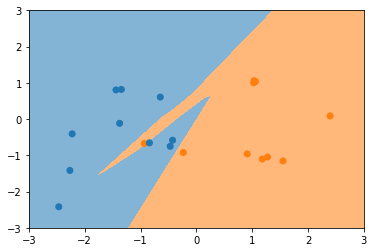

In [7]:
# Create a grid of points to classify
xx1, xx2 = np.meshgrid(np.arange(-3, 3, 0.005), np.arange(-3, 3, 0.005))

# Flatten the grid to pass into model
grid = np.c_[xx1.ravel(), xx2.ravel()].T

# Predict classification at every point on the grid
Z = (model.predict(grid.T).T)[1,:].reshape(xx1.shape)

# Plot the prediction regions.
plt.imshow(Z, interpolation='bicubic', origin='lower', extent=[-3, 3, -3, 3], 
           cmap=ListedColormap(['#1f77b4', '#ff7f0e']), alpha=0.55, aspect='auto')

# Plot the original points.
_ = plt.scatter(X[0,:], X[1,:], c=Y[1,:], cmap=ListedColormap(['#1f77b4', '#ff7f0e']))